In [ ]:
!pip install librosa soundfile numpy pydub

In [ ]:
import os #os module import qilamiz yollar bilan ishlashga
Root = "/content/drive/ColabNotebook/Voice/DatasetRAVDESS" # Ildiz manzil
os.chdir(Root) # katalogni o'zgarish

In [ ]:
from pydub import AudioSegment

sound1 = AudioSegment.from_wav("/content/drive/ColabNotebook/Voice/DatasetRAVDESS/happy-birthday.wav")
sound2 = AudioSegment.from_wav("/content/drive/ColabNotebook/Voice/DatasetRAVDESS/shum.wav")

combined_sounds = sound1 + sound2
combined_sounds.export("/content/drive/ColabNotebook/Voice/DatasetRAVDESS/path.wav", format="wav")

<_io.BufferedRandom name='/content/drive/ColabNotebook/Voice/DatasetRAVDESS/path.wav'>

In [ ]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
# RAVDESS ma'lumotlar to'plamidagi his-tuyg'ular
emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
#'neutral', neytral
#'calm', sokin
#'happy', xursand
#'sad', xafa
#'angry', jahl
#'fearful', qo'rqinchli
#'disgust', jirkanish
#'surprised' hayron

In [ ]:
for number in range(len(emotions)):
    emotion = emotions[number]
    path = f'/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-0{number+1}-01-01-01-01.wav'
    data, sampling_rate = librosa.load(path)
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

NameError: ignored

In [ ]:
# emotion = 'neutral'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-01-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'calm'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-02-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'happy'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-03-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'sad'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-04-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'angry'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-05-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'fearful'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-06-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [ ]:
# emotion = 'disgust'
# path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/1/03-01-07-01-01-01-01.wav'
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

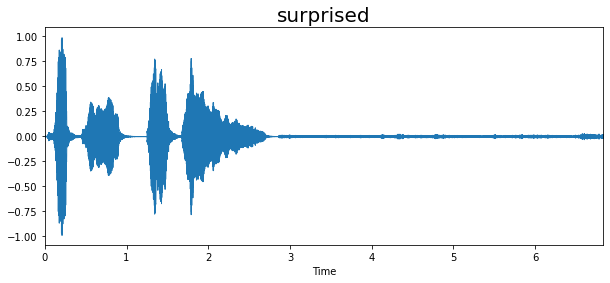

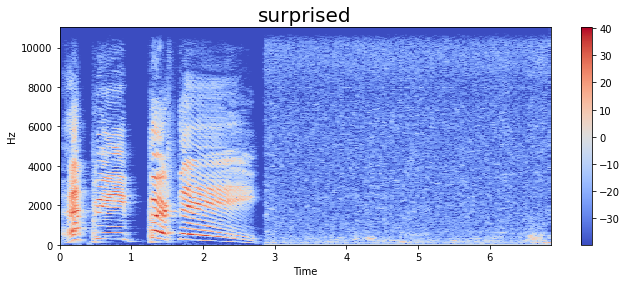

In [ ]:
emotion = 'surprised'
path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/path.wav'
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# (mfcc, chroma, mel) larni ovozdan chiqarish
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# hissiyotlar RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#kuzatish hissiyotlar
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
from pydub import AudioSegment
#malumotni yuklash va har bir audio faylni xususiyatlarni chiqarish
def load_data(test_size=0.25):
    x,y=[],[]
    for file in glob.glob("/content/drive/ColabNotebook/Voice/DatasetRAVDESS/*/*.wav"):
          #stereo ni mono ga otkazish
        sound = AudioSegment.from_wav(file)
        sound = sound.set_channels(1)
        sound.export(file, format="wav")
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#malumotlarni bolish
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-4.89589355e+02,  3.87984200e+01, -2.16371326e+01, ...,
         1.41056335e-05,  1.49608286e-06,  1.22345556e-08],
       [-8.06009277e+02,  8.82700729e+01,  2.15520096e+01, ...,
         6.13391471e-09,  6.10311135e-09,  6.02070305e-09],
       [-7.43617676e+02,  4.24520149e+01, -8.27632332e+00, ...,
         1.91238492e-08,  7.28286276e-09,  4.09446832e-09],
       ...,
       [-6.41146973e+02,  6.18556404e+01, -7.08898306e+00, ...,
         1.37073229e-07,  1.57031987e-08,  6.19557250e-09],
       [-6.49186218e+02,  6.55354843e+01,  9.51844788e+00, ...,
         4.40952221e-07,  4.13705976e-08,  7.82509435e-09],
       [-7.44665466e+02,  5.41580315e+01, -4.02489781e-01, ...,
         1.12393373e-07,  1.48589026e-08,  7.33234051e-09]])

In [ ]:
#mashhulot va test uchun malumotlarni olish
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#xususiyatlar soni
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
# Multi Layer Perceptron Classifier ishga tushurish
model=MLPClassifier(alpha=0.0015, batch_size=350, epsilon=1e-07, hidden_layer_sizes=(350,), learning_rate='constant', max_iter=400, activation='tanh')

In [ ]:
#model orgatish
model.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0015, batch_size=350, epsilon=1e-07,
              hidden_layer_sizes=(350,), max_iter=400)

In [ ]:
#testiviy malumotlarni olish basharotga
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['happy', 'calm', 'calm', 'fearful', 'happy', 'calm', 'happy',
       'happy', 'disgust', 'fearful', 'disgust', 'disgust', 'happy',
       'calm', 'disgust', 'disgust', 'happy', 'calm', 'disgust',
       'disgust', 'happy', 'disgust', 'happy', 'happy', 'disgust', 'calm',
       'fearful', 'fearful', 'disgust', 'fearful', 'fearful', 'happy',
       'calm', 'disgust', 'fearful', 'calm', 'happy', 'happy', 'fearful',
       'happy', 'happy', 'disgust', 'happy', 'calm', 'fearful', 'disgust',
       'calm', 'fearful', 'disgust', 'disgust', 'fearful', 'calm', 'calm',
       'disgust', 'fearful', 'calm', 'disgust', 'disgust', 'fearful',
       'happy', 'happy', 'fearful', 'calm', 'calm', 'disgust', 'fearful',
       'calm', 'disgust', 'calm', 'fearful', 'happy', 'happy', 'fearful',
       'fearful', 'fearful', 'fearful', 'happy', 'calm', 'happy', 'happy',
       'disgust', 'disgust', 'disgust', 'calm', 'calm', 'fearful',
       'disgust', 'happy', 'calm', 'calm', 'disgust', 'calm', 'fear

In [ ]:
# bizni modelni Aniqligini hisoblash
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.33%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.86419753, 0.8627451 , 0.83636364, 0.76923077])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,calm
2,calm,calm
3,fearful,fearful
4,disgust,happy
5,calm,calm
6,happy,happy
7,happy,happy
8,disgust,disgust
9,calm,fearful


In [ ]:
import pickle
# modelni saqlash
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

feature=extract_feature("/content/drive/ColabNotebook/Voice/Training/happy-birthday.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)


prediction=loaded_model.predict(feature)
prediction[0]

### **DEMO VERSION **

In [ ]:
!pip install ffmpeg-python

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import soundfile as sf


AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("yozishni boshlash uchun tugmani bosing");

my_btn.appendChild(t);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    mimeType : 'audio/webm;codecs=opus'
  };            
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };

recordButton.innerText = "Yozilmoqda... toxtashish uchun tugmani bosing";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Ovoz saqlanmoqda... iltimos kutib turing!"
  }
}


function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8

  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)


  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  sf.write('sound.wav', audio, 48000)

  return audio, sr

In [ ]:
audio, sr = get_audio()
print(audio)
print(sr)

[  0   0   0 ... 163 218 235]
48000


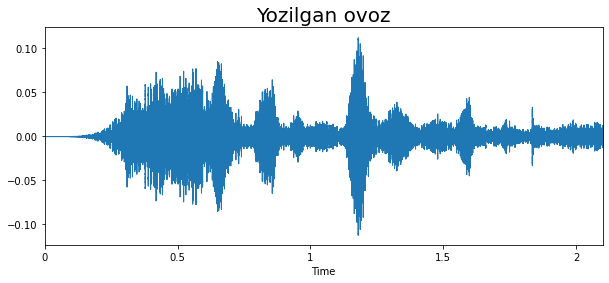

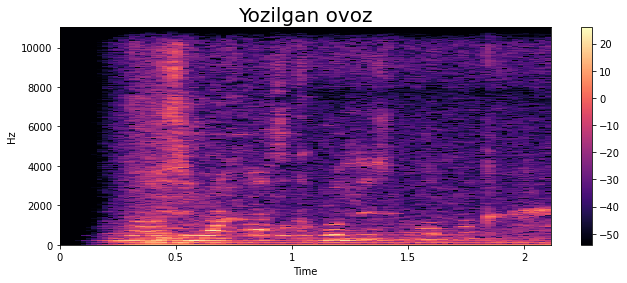

In [ ]:
emotion = 'Yozilgan ovoz'
path = '/content/drive/ColabNotebook/Voice/DatasetRAVDESS/sound.wav'
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
import pickle
# modelni saqlash
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

feature=extract_feature('/content/drive/ColabNotebook/Voice/DatasetRAVDESS/sound.wav', mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)


prediction=loaded_model.predict(feature)
prediction[0]

'disgust'